In [1]:
%matplotlib inline
import cv2

import numpy as np
import matplotlib.pyplot as plt

import os
import sys
cwd = os.getcwd()
sys.path.append(os.path.join(cwd, '..'))

from sklearn.externals import joblib
from aye.preprocessing import *
from aye.fruit_detector import FruitDetector
from aye.blob_analysis import *
from aye.bounding_box import *

In [2]:
# Load classifier and scaler
clf = joblib.load('../model/svc.pkl')
scaler = joblib.load('../model/scaler.pkl')
detector = FruitDetector(clf, scaler)

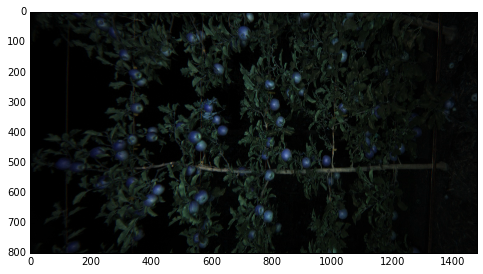

In [3]:
# Load image
im_dir = os.path.join(cwd, 'images')
im = cv2.imread(os.path.join(im_dir, 'frame0001.jpg'))
im = im[200:1000, :1480, :]

fig = plt.figure(figsize=(8,6))
plt.imshow(im, cmap=plt.cm.gray)

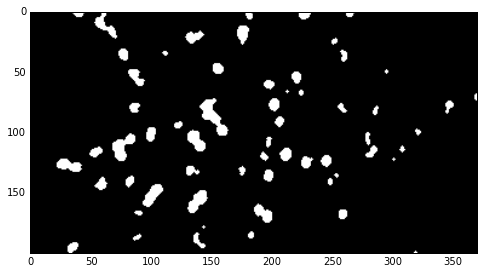

In [4]:
s, bw = detector.detect(im)
bw = clean_bw(bw)
fig = plt.figure(figsize=(8,6))
plt.imshow(bw, cmap=plt.cm.gray)

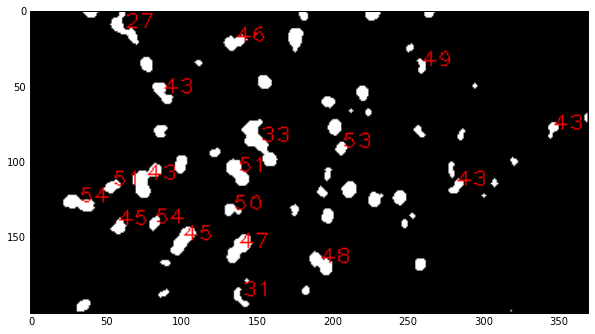

In [36]:
blobs, bw_filled = region_props(bw)

disp = cv2.cvtColor(bw_filled, cv2.COLOR_GRAY2RGB)
# TODO: need another learning algorithm to find out which blob has multiple fruits
for blob in blobs:
    if blob['extent'] < 0.55 and blob['area'] > 25:
        text = "{0}".format(int(blob['extent'] * 100))
        x, y = blob['bbox_center']
        cv2.putText(disp, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,0), 1)
fig = plt.figure(figsize=(10,10))
plt.imshow(disp)


blobs = blobs[blobs['area'] > 100]

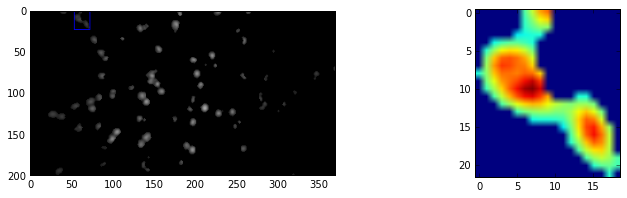

In [7]:
v = s.im_hsv[:, :, -1]
v_bw = np.array(v, copy=True)
v_bw[~(bw > 0)] = 0
disp = cv2.cvtColor(v_bw, cv2.COLOR_GRAY2BGR)

stat = stats[7]
v_stat = extract_bbox(v_bw, stat['bbox'])

draw_bboxes(disp, stat['bbox'], color=(0, 0, 255), thickness=1)

fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(121)
ax.imshow(disp)
ax = fig.add_subplot(122)
ax.imshow(v_stat)

In [38]:
print(num_local_maximas(v_stat))

3


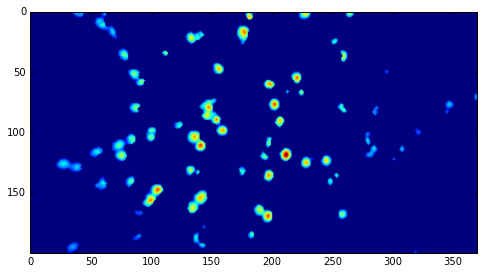

In [37]:
# Look at hsv
v = s.im_hsv[:, :, -1]
bw = bw > 0
v[~bw] = 0

fig = plt.figure(figsize=(8,6))
plt.imshow(v)